In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir(r'C:\Post Graduate Course in Data Analytics\KAGGLE DATASETS, SCRIPTS & PPTS\BITCOIN VALUE TIME SERIES PROJECT')

In [75]:
df=pd.read_csv('coin_Bitcoin.csv')
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [77]:
df1=df.reset_index()['Close']
df1

0         144.539993
1         139.000000
2         116.989998
3         105.209999
4          97.750000
            ...     
2986    33897.048590
2987    34668.548402
2988    35287.779766
2989    33746.002456
2990    34235.193451
Name: Close, Length: 2991, dtype: float64

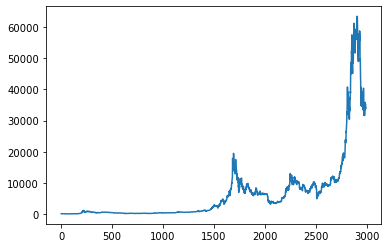

In [78]:
plt.plot(df1)

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
sc=MinMaxScaler(feature_range=(0,1))
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [81]:
df1

array([[0.00119979],
       [0.00111246],
       [0.00076549],
       ...,
       [0.5552035 ],
       [0.53089867],
       [0.53861036]])

In [82]:
train_size=int(len(df1)*0.75)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [83]:
len(train_data)

2243

In [84]:
len(test_data)

748

In [85]:
def create_dataset(dataset,time_step):
    x,y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i+time_step,0])
    return np.array(x),np.array(y)

In [86]:
xtrain,ytrain=create_dataset(train_data,150)

In [87]:
xtrain.shape

(2092, 150)

In [88]:
ytrain.shape

(2092,)

In [92]:
xtest,ytest=create_dataset(test_data,150)

In [93]:
xtest.shape

(597, 150)

In [94]:
ytest.shape

(597,)

In [95]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [96]:
print(xtrain.shape,xtest.shape)

(2092, 150, 1) (597, 150, 1)


In [33]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [102]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [103]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 150, 50)           10400     
_________________________________________________________________
lstm_20 (LSTM)               (None, 150, 50)           20200     
_________________________________________________________________
lstm_21 (LSTM)               (None, 150, 50)           20200     
_________________________________________________________________
lstm_22 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [105]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=100,verbose=1)

Epoch 1/100
21/21 [==============================] - 27s 885ms/step - loss: 0.0013 - val_loss: 0.0316
Epoch 2/100
21/21 [==============================] - 15s 719ms/step - loss: 3.0270e-04 - val_loss: 0.0193
Epoch 3/100
21/21 [==============================] - 14s 665ms/step - loss: 2.0567e-04 - val_loss: 0.0175
Epoch 4/100
21/21 [==============================] - 13s 628ms/step - loss: 1.8674e-04 - val_loss: 0.0181
Epoch 5/100
21/21 [==============================] - 14s 671ms/step - loss: 1.6027e-04 - val_loss: 0.0170
Epoch 6/100
21/21 [==============================] - 13s 628ms/step - loss: 1.4632e-04 - val_loss: 0.0200
Epoch 7/100
21/21 [==============================] - 13s 640ms/step - loss: 1.2477e-04 - val_loss: 0.0301
Epoch 8/100
21/21 [==============================] - 14s 657ms/step - loss: 1.2378e-04 - val_loss: 0.0255
Epoch 9/100
21/21 [==============================] - 14s 644ms/step - loss: 1.2256e-04 - val_loss: 0.0395
Epoch 10/100
21/21 [==============================

In [106]:
train_predict=model.predict(xtrain)
test_predict=model.predict(xtest)

In [107]:
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
np.sqrt(mean_squared_error(ytrain,train_predict))

4401.440320150487

In [110]:
np.sqrt(mean_squared_error(ytest,test_predict))

23445.32588801907

In [112]:
look_back=150
trainpredictplot=np.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict

testpredictplot=np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict


In [113]:
trainpredictplot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

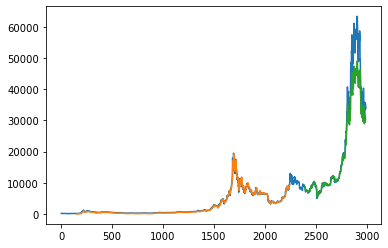

In [114]:
plt.plot(sc.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [115]:
len(test_data)

748

In [134]:
x_input=test_data[597:].reshape(1,-1)
x_input.shape

(1, 151)

In [135]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [136]:
len(temp_input)

151

In [137]:
lst_output=[]
n_steps=150
i=0
while (i<31):
    if (len(temp_input)>150):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print('{} day input {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [[0.4767276]]
1 day input [[0.44471171]]
2 day input [[0.41442505]]
3 day input [[0.3900524]]
4 day input [[0.37229934]]
5 day input [[0.36068982]]
6 day input [[0.3539599]]
7 day input [[0.3505487]]
8 day input [[0.34894186]]
9 day input [[0.3478729]]
10 day input [[0.34641644]]
11 day input [[0.3440025]]
12 day input [[0.34038314]]
13 day input [[0.33557153]]
14 day input [[0.32976717]]
15 day input [[0.32328022]]
16 day input [[0.31646279]]
17 day input [[0.3096511]]
18 day input [[0.30312622]]
19 day input [[0.29709023]]
20 day input [[0.29165998]]
21 day input [[0.28687313]]
22 day input [[0.28270438]]
23 day input [[0.27908358]]
24 day input [[0.27591616]]
25 day input [[0.27310017]]
26 day input [[0.27053967]]
27 day input [[0.2681529]]
28 day input [[0.2658778]]
29 day input [[0.2636725]]
30 day input [[0.26151434]]


In [138]:
day_new=np.arange(1,151)
day_pred=np.arange(151,182)

In [139]:
len(df1)

2991

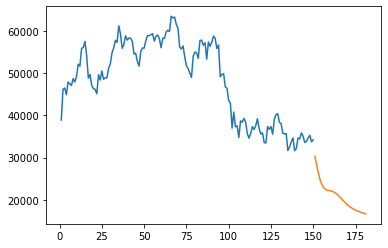

In [140]:
plt.plot(day_new,sc.inverse_transform(df1[2841:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

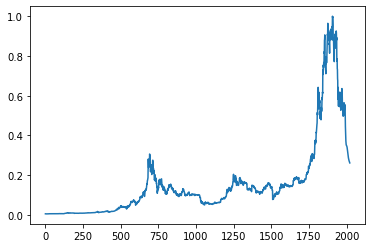

In [141]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])